# Tree Classification

In [1]:
import os
import sys
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from utils.data_loader import DataLoader
from utils.calculate_indices import CalculateIndices
from utils.basic_analysis import BasicDataAnalysis
from utils.visualization_histogram import HistogramDataVisualization
from utils.time_series_aggregate import TimeSeriesAggregate
from utils.visualization_spectral import SpectralBandPlotter
from utils.correlation_analysis import CorrelationAnalysis
from utils.visualization_time_series import plot_date_diff_distribution
from utils.sits_outlier_cleaner import SITSOutlierCleaner
from utils.visualization_function import (
    plot_intervals_timestamps,
    plot_top_correlations,
    plot_autocorrelation,
    plot_band_differences,
)
from utils.visualization_anomaly_detection import (
    plot_with_outliers_subplot,
    plot_outlier_detection_grid,
)
from utils.constants import spectral_bands, indices

In [3]:
def get_sample(df, id_col="id", time_col="time", n_ids=40):
    df_sorted = df.sort_values(by=[id_col, time_col])
    unique_ids = df_sorted[id_col].drop_duplicates().head(n_ids)
    return df_sorted[df_sorted[id_col].isin(unique_ids)]

In [4]:
dataloader = DataLoader()
df_base = dataloader.load_transform("../../data/raw_trainset.csv")

## Basic Data Analysis

In [5]:
basicanalysis = BasicDataAnalysis(df_base)
basicanalysis.get_dtypes()

time                datetime64[ns]
id                           int64
disturbance_year             int64
doy                          int64
b2                           int64
b3                           int64
b4                           int64
b5                           int64
b6                           int64
b7                           int64
b8                           int64
b8a                          int64
b11                          int64
b12                          int64
species                     object
dtype: object

In [6]:
print(f"Raw Dataset cols:{basicanalysis.get_num_cols()}")
print(f"Raw Dataset rows:{basicanalysis.get_num_rows()}")

Raw Dataset cols:15
Raw Dataset rows:4074354


In [7]:
basicanalysis.get_desricption()

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,b8,b8a,b11,b12
count,4074354,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06
mean,2020-02-05 05:16:36.360551936,1.408675e+04,2.522988e+02,1.763385e+02,2.726073e+02,4.309495e+02,3.465769e+02,6.764691e+02,1.683092e+03,2.040237e+03,2.166979e+03,2.290828e+03,1.158527e+03,6.015298e+02
min,2017-01-01 00:00:00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2018-09-24 00:00:00,7.038000e+03,0.000000e+00,1.060000e+02,1.560000e+02,2.810000e+02,1.750000e+02,4.600000e+02,1.268000e+03,1.529000e+03,1.629000e+03,1.741000e+03,7.300000e+02,3.360000e+02
50%,2020-03-15 00:00:00,1.406300e+04,0.000000e+00,1.760000e+02,2.230000e+02,3.710000e+02,2.570000e+02,5.880000e+02,1.547000e+03,1.856000e+03,1.971000e+03,2.092000e+03,1.011000e+03,4.810000e+02
75%,2021-06-16 00:00:00,2.113300e+04,0.000000e+00,2.450000e+02,3.220000e+02,5.030000e+02,3.990000e+02,7.840000e+02,1.924000e+03,2.327000e+03,2.464000e+03,2.610000e+03,1.441000e+03,7.090000e+02
max,2022-11-02 00:00:00,2.821200e+04,2.020000e+03,3.660000e+02,2.008700e+04,1.753400e+04,1.752400e+04,1.794000e+04,1.982700e+04,2.143900e+04,2.181100e+04,2.469400e+04,1.855400e+04,1.758700e+04
std,NaN,8.145028e+03,6.675001e+02,8.521531e+01,2.202539e+02,2.602215e+02,3.086128e+02,3.482985e+02,6.457464e+02,8.024451e+02,8.532377e+02,8.597645e+02,6.092414e+02,4.196677e+02


In [8]:
basicanalysis.get_missing_counts()

time                0
id                  0
disturbance_year    0
doy                 0
b2                  0
b3                  0
b4                  0
b5                  0
b6                  0
b7                  0
b8                  0
b8a                 0
b11                 0
b12                 0
species             0
dtype: int64

## Feature Engineering

### Basic Feature Engineering

In [9]:
df = dataloader.feature_extraction(df_base)

### Datetime Feature Engineering

In [10]:
df = dataloader.date_feature_extraction(df)

### Advanced Feature Engineering

In [ ]:
calcindices = CalculateIndices()
df = calcindices.add_all_indices(df)

## Exploratory Data Analysis

### Visualization Base-Dataframe 

In [ ]:
hist = HistogramDataVisualization(df)
hist.plot_unique_ids("year")

In [ ]:
hist.plot_unique_ids("month_num")

In [ ]:
hist.plot_unique_ids("species")

In [ ]:
hist.plot_median_id_distribution()

## Correlation Analysis

In [ ]:
correlation = CorrelationAnalysis(df)
corr_matrix = correlation.get_correlation_matrix()
corr_matrix

In [ ]:
correlation.plot_correlation_matrix()

In [ ]:
top_corr_df = correlation.get_top_correlations(top_n=15)
plot_top_correlations(top_corr_df)

In [ ]:
# correlation.plot_correlation_distribution(sample_size=100)

## Disturbed

In [ ]:
unique_values = df["disturbance_year"].unique()
print(f"Nunique: {len(unique_values)}")
print(f"Unique Values:\n{unique_values}")

In [ ]:
dist_disturbance_df = df["is_disturbed"].value_counts().reset_index()
dist_disturbance_df.columns = ["is_disturbed", "count"]


plt.figure(figsize=(8, 5))
plt.bar(dist_disturbance_df["is_disturbed"].astype(str), dist_disturbance_df["count"])
plt.xlabel("Disturbed")
plt.ylabel("Count")
plt.title("Comparison of distrubed values")
plt.grid()
plt.show()

In [ ]:
filtered = df[df["disturbance_year"] != 0]
crosstab = pd.crosstab(filtered["disturbance_year"], filtered["species"])
crosstab.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xlabel("Disturbance Year")
plt.ylabel("Anzahl")
plt.title("Distribution of Disturbance Year by Species")
plt.legend(title="Species")
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
test = df[df["is_disturbed"]].copy()
test["disturbance_year_diff"] = test["disturbance_year"] - test["year"]
test

In [ ]:
values = test["disturbance_year_diff"].dropna()

fig = plt.figure(figsize=(10, 6))
grid = fig.add_gridspec(2, 1, height_ratios=[1, 4], hspace=0.05)
ax_box = fig.add_subplot(grid[0, 0])
ax_box.boxplot(values, vert=False, patch_artist=True)
ax_box.set(xticks=[], xlabel="")
ax_box.set_yticks([])
ax_box.set_title("Distribution of Disturbance Year Differences")
ax_hist = fig.add_subplot(grid[1, 0])
ax_hist.hist(values, bins=30, alpha=0.7, edgecolor="black")
ax_hist.set_xlabel("disturbance_year_diff")
ax_hist.set_ylabel("Frequency")
ax_hist.grid()
plt.show()

In [ ]:
filtered.sort_values(by="disturbance_year", ascending=True)

In [ ]:
filtered = df[df["disturbance_year"] != 0]
id_df = filtered[filtered["id"] == 11759]
id_df

In [ ]:
band_columns = [col for col in id_df.columns if col.startswith("b")]
fig = px.line(id_df, x="time", y=band_columns, markers=":")
fig.show()

## Explore Spectral

In [ ]:
spectral = SpectralBandPlotter(df)
spectral.plot_all_years(sample_size=500, showfliers=True)

In [ ]:
spectral.plot_per_year(sample_size=500)

In [ ]:
spectral.plot_species_season_distribution()

## Time Series Analysis

In [ ]:
plot_date_diff_distribution(df)

In [ ]:
ts_agg = TimeSeriesAggregate(id_df)
df_2w = ts_agg.aggregate_timeseries(freq="2W", method="median")
dataloader = DataLoader()
df_2w_features = dataloader.date_feature_extraction(df_2w)

In [ ]:
spectral = SpectralBandPlotter(df_2w_features)
spectral.plot_spectral_development_over_years(addition="aggregated")

In [ ]:
plot_intervals_timestamps(df_2w_features, addition="aggregated")

### Autocorrelation

In [ ]:
plot_autocorrelation(df_2w_features, "ndvi")

In [ ]:
plot_band_differences(df_2w_features)

# Anomaly Detection

In [18]:
df_sample = get_sample(df, n_ids=40)

cleaner = SITSOutlierCleaner()
cleaner.fit_transform(df_sample, band_columns=spectral_bands)
df_with_any_flag = cleaner.add_any_outlier_flag()
id_df = df_with_any_flag[df_with_any_flag["id"] == 24]
df_interpolated = cleaner.get_interpolated_only()

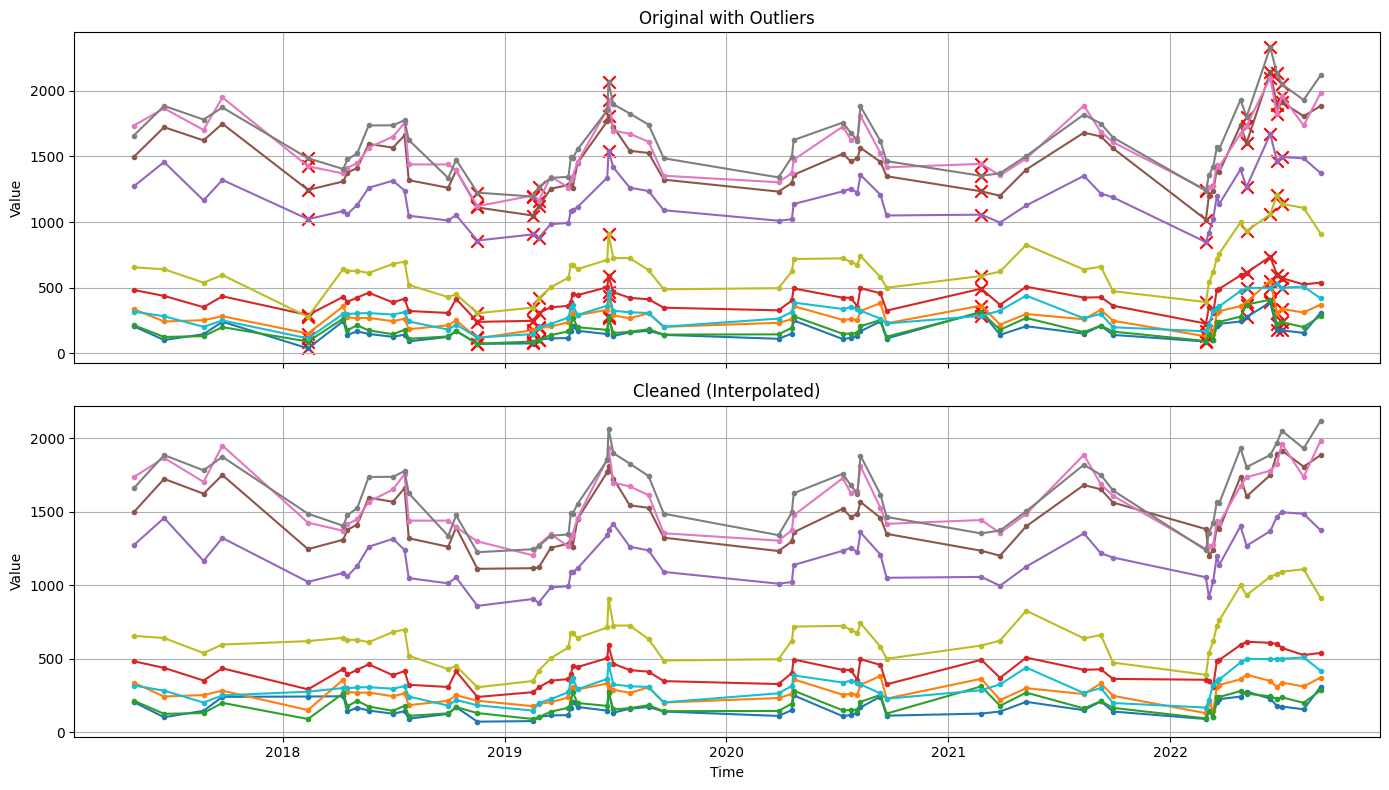

In [19]:
plot_with_outliers_subplot(id_df, spectral_bands)

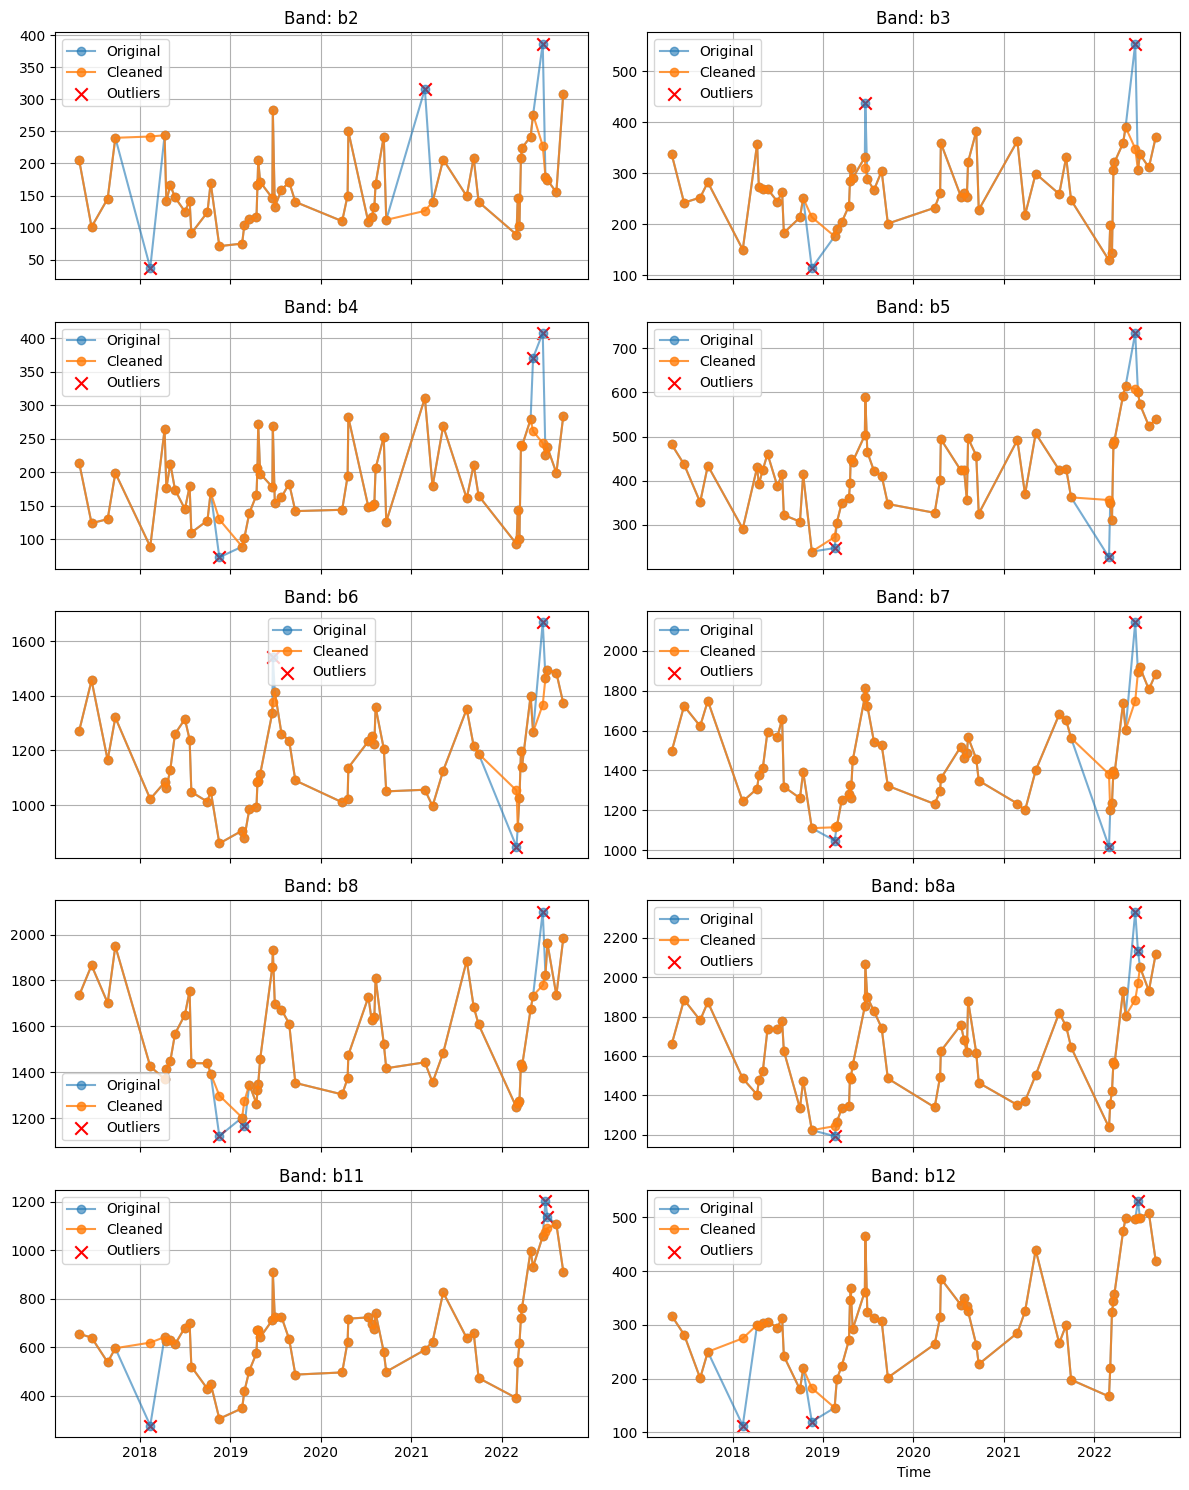

In [20]:
plot_outlier_detection_grid(id_df, bands=spectral_bands)

In [21]:
df_interpolated

,id,time,b2,b3,b4,b5,b6,b7,b8,b8a,b11,b12
808190,1,2017-03-13,147.0,204.0,145.0,400.0,1193.0,1435.0,1593.0,1642.0,672.0,347.0
808191,1,2017-03-27,137.0,222.0,154.0,389.0,1247.0,1561.0,1557.0,1747.0,743.0,388.0
808192,1,2017-04-09,160.0,248.0,169.0,395.0,1209.0,1454.0,1530.0,1786.0,674.0,327.0
808193,1,2017-04-22,146.0,247.0,152.0,391.0,1354.0,1628.0,1672.0,1878.0,673.0,305.0
808194,1,2017-04-29,171.0,264.0,186.0,419.0,1353.0,1731.0,1806.0,1938.0,743.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2148359,40,2022-08-20,165.0,255.0,180.0,428.0,1252.0,1702.0,1784.0,1781.0,748.0,307.0
2148360,40,2022-10-01,82.0,173.0,87.0,266.0,975.0,1338.0,1345.0,1421.0,403.0,150.0
2148361,40,2022-10-08,108.0,183.0,101.0,277.0,1003.0,1333.0,1362.0,1365.0,420.0,176.0
2148362,40,2022-10-12,96.0,170.0,100.0,297.0,972.0,1248.0,1358.0,1402.0,422.0,170.0
